# Libraries

In [99]:
# data 
import pandas as pd
import numpy as np
import itertools

# visualization
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# metrics
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing

# algorythms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn import svm

# Functions

In [100]:
# Function to visualize confusion matrix

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

# Data and cleaning

In [145]:
# Cleaning df
df_clean = pd.read_csv('GG_df_clean.csv')
df_clean = df_clean.dropna()
df_clean = df_clean.drop(['first_name', 'Last_Name', 'Unnamed: 0'], axis=1)
df_clean = df_clean.iloc[:2596]

In [146]:
df_clean.head()

,Season,Name,Team,Pos,Inn,rGFP,DRS,BIZ,Plays,OOZ,...,playerid,G,GS,PO,A,E,DP,DPS,FP,Target
16,2013,Leonys Martin,TEX,CF,974.1,-1.0,14.0,230.0,211.0,76.0,...,11846.0,127.0,109.0,287.0,11.0,5.0,0.0,1.0,0.984,0.0
23,2009,Franklin Gutierrez,SEA,CF,1353.1,4.0,33.0,345.0,333.0,113.0,...,3255.0,153.0,152.0,445.0,6.0,7.0,0.0,2.0,0.985,0.0
28,2006,Adam Everett,HOU,SS,1292.1,0.0,34.0,396.0,353.0,60.0,...,1430.0,149.0,146.0,202.0,479.0,7.0,102.0,43.0,0.990,0.0
34,2007,Omar Vizquel,SFG,SS,1219.1,0.0,16.0,395.0,350.0,47.0,...,411.0,143.0,136.0,198.0,444.0,9.0,85.0,47.0,0.986,0.0
37,2014,Leonys Martin,TEX,CF,1247.1,3.0,16.0,336.0,306.0,109.0,...,11846.0,152.0,140.0,415.0,11.0,8.0,0.0,3.0,0.982,0.0


In [147]:
# Subsetting target variable (Gold Glove Awards)
target = df_clean['Target']

# Preparing features
features = df_clean.drop(['Season', 'Name', 'Team', 'playerid', 'Target'], axis = 1, inplace = False)

# Get dummies for categorical values
features = pd.get_dummies(features)

features.head()

,Inn,rGFP,DRS,BIZ,Plays,OOZ,RngR,ErrR,UZR,UZR/150,...,DP,DPS,FP,Pos_1B,Pos_2B,Pos_3B,Pos_CF,Pos_LF,Pos_RF,Pos_SS
16,974.1,-1.0,14.0,230.0,211.0,76.0,4.1,-0.3,10.6,13.7,...,0.0,1.0,0.984,0,0,0,1,0,0,0
23,1353.1,4.0,33.0,345.0,333.0,113.0,32.2,-2.1,31.0,29.0,...,0.0,2.0,0.985,0,0,0,1,0,0,0
28,1292.1,0.0,34.0,396.0,353.0,60.0,16.6,7.5,25.1,25.7,...,102.0,43.0,0.990,0,0,0,0,0,0,1
34,1219.1,0.0,16.0,395.0,350.0,47.0,15.6,7.5,23.9,24.0,...,85.0,47.0,0.986,0,0,0,0,0,0,1
37,1247.1,3.0,16.0,336.0,306.0,109.0,1.1,-1.5,11.5,10.1,...,0.0,3.0,0.982,0,0,0,1,0,0,0


In [148]:
# Scaling features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_data, columns = features.columns)
features = scaled_df

scaled_df.head()

,Inn,rGFP,DRS,BIZ,Plays,OOZ,RngR,ErrR,UZR,UZR/150,...,DP,DPS,FP,Pos_1B,Pos_2B,Pos_3B,Pos_CF,Pos_LF,Pos_RF,Pos_SS
0,-0.989492,-0.629983,1.314439,-0.178192,0.131470,1.077906,0.559456,-0.346370,1.230031,1.380237,...,-1.018081,-0.981737,0.184847,-0.421222,-0.41695,-0.418375,2.431755,-0.336045,-0.387971,-0.461048
1,1.101330,2.050107,3.263244,0.939635,1.595394,2.499125,4.665688,-1.079972,3.824951,3.041748,...,-1.018081,-0.920379,0.258291,-0.421222,-0.41695,-0.418375,2.431755,-0.336045,-0.387971,-0.461048
2,0.764812,-0.093965,3.365813,1.435367,1.835381,0.463324,2.386072,2.832571,3.074459,2.683383,...,1.382128,1.595323,0.625512,-0.421222,-0.41695,-0.418375,-0.411226,-0.336045,-0.387971,2.168971
3,0.362095,-0.093965,1.519576,1.425647,1.799383,-0.036023,2.239942,2.832571,2.921817,2.498771,...,0.982093,1.840757,0.331735,-0.421222,-0.41695,-0.418375,-0.411226,-0.336045,-0.387971,2.168971
4,0.516562,1.514089,1.519576,0.852153,1.271411,2.345480,0.121068,-0.835438,1.344513,0.989293,...,-1.018081,-0.859020,0.037959,-0.421222,-0.41695,-0.418375,2.431755,-0.336045,-0.387971,-0.461048


In [149]:
# Testing/Trainging data split for model 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

# Decision Tree

In [195]:
# model
dt = DecisionTreeClassifier(random_state=10)  

# train
dt = dt.fit(X_train, y_train)

# predict
dt_train_preds = dt.predict(X_train)
dt_test_preds = dt.predict(X_test)

# evaluate
dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)
dt_test_precision = precision_score(y_test, dt_test_preds)
dt_test_F1 = f1_score(y_test, dt_test_preds)
dt_report = classification_report(y_test, dt_test_preds)

# append accuracy score to our dataframe
score_dt = ['Vanilla Decision Tree', dt_train_accuracy, dt_test_accuracy, dt_test_precision, dt_test_F1]
models1 = pd.DataFrame([score_dt])

In [151]:
print('Classification Report Vanilla Decision Tree: \n', dt_report)
print('------------------------------------------------------')
print('')
print('Vanilla Decision Tree')
print('------------------------------------------------------')
print(f"Training Accuracy: {(dt_train_accuracy * 100):.4}%")
print(f"Test Accuracy:     {(dt_test_accuracy * 100):.4}%")

Classification Report Vanilla Decision Tree: 
               precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       516
         1.0       0.31      0.43      0.36        63

    accuracy                           0.83       579
   macro avg       0.62      0.66      0.63       579
weighted avg       0.86      0.83      0.85       579

------------------------------------------------------

Vanilla Decision Tree
------------------------------------------------------
Training Accuracy: 100.0%
Test Accuracy:     83.42%


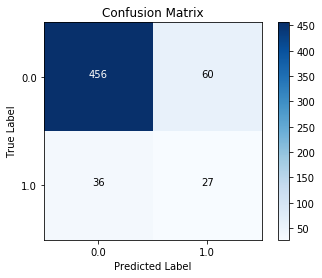

In [152]:
show_cf(y_test, dt_test_preds)

# Baseline Random Forest

In [194]:
# ensemble method model
rf = RandomForestClassifier(random_state = 123)

# train
rf = rf.fit(X_train, y_train)

# predict
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

# evaluate
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
rf_test_precision = precision_score(y_test, rf_test_preds)
rf_test_F1 = f1_score(y_test, rf_test_preds)
rf_report = classification_report(y_test, rf_test_preds)

# store accuracy in a new dataframe
score_rf = ['Random Forest', rf_train_accuracy, rf_test_accuracy, rf_test_precision, rf_test_F1]
models1 = models1.append([score_rf])

In [154]:
print('Classification Report Random Forest: \n', rf_report)
print('------------------------------------------------------')
print('')
print('Random Forest')
print('------------------------------------------------------')
print(f"Training Accuracy: {(rf_train_accuracy * 100):.4}%")
print(f"Test Accuracy:     {(rf_test_accuracy * 100):.4}%")

Classification Report Random Forest: 
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       516
         1.0       0.53      0.13      0.21        63

    accuracy                           0.89       579
   macro avg       0.72      0.56      0.57       579
weighted avg       0.86      0.89      0.86       579

------------------------------------------------------

Random Forest
------------------------------------------------------
Training Accuracy: 98.39%
Test Accuracy:     89.29%


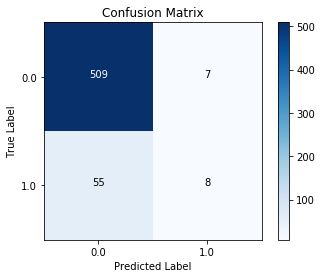

In [155]:
show_cf(y_test, rf_test_preds)

In [156]:
columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test F1']
models1.columns = columns
models1

,Model,Train Accuracy,Test Accuracy,Test Precision,Test F1
0,Vanilla Decision Tree,1.00000,0.834197,0.310345,0.360000
0,Random Forest,0.98388,0.892919,0.533333,0.205128


# Testing 2019 Data with Adaboost

In [157]:
import warnings
warnings.filterwarnings("ignore")
# model
adaboost = AdaBoostClassifier()

# train
adaboost = adaboost.fit(X_train, y_train)

# predict
adaboost_train_preds = adaboost.predict(X_train)
adaboost_test_preds = adaboost.predict(X_test)

# evaluate
adaboost_train_accuracy = accuracy_score(y_train, adaboost_train_preds)
adaboost_test_accuracy = accuracy_score(y_test, adaboost_test_preds)
adaboost_test_precision = precision_score(y_test, adaboost_test_preds)
adaboost_test_F1 = f1_score(y_test, adaboost_test_preds)
adaboost_report = classification_report(y_test, adaboost_test_preds)

print('Train Acc:', adaboost_train_accuracy)
print('Test Acc:', adaboost_test_accuracy)
print('Test Precision:', adaboost_test_precision)
print('Test F1:', adaboost_test_F1)

Train Acc: 0.899251583189407
Test Acc: 0.8929188255613126
Test Precision: 0.5142857142857142
Test F1: 0.3673469387755102


# Prepping 2019 data

In [247]:
dfA = pd.read_csv('19TestAdvanced.csv')
dfA = dfA.drop(['rTS', 'rCERA', 'rSB', 'rSZ', 'rARM', 'FSR', 'FRM', 'ARM', 'rGDP', 'rPM', 'RZR', 'FSR', 'FRM', 'ARM', 'DPR'], axis = 1)

dfB = pd.read_csv('19TestStandard.csv')
dfB = dfB.drop(['Name', 'Team', 'Pos', 'Inn', 'DPT', 'DPF', 'Scp', 'SB', 'CS', 'PB', 'WP', 'FE', 'TE', 'TZ'], axis = 1)

df = pd.merge(dfA, dfB, on=['Season', 'playerid'])
df.shape

(159, 24)

In [248]:
# Little function to erase Jr. from player's last names
import re
def jr_replace(x):
    match = re.sub(r'Jr.$',"",x)
    return match

df['Name'] = df['Name'].apply(jr_replace)

In [249]:
# Split name into first/last columns for joining purposes

df[['first_name','Last_Name']] = df['Name'].loc[df['Name'].str.split().str.len() == 2].str.split(expand=True)

In [250]:
df = df.drop(['first_name', 'Last_Name'], axis=1)

In [251]:
df.head()

,Season,Name,Team,Pos,Inn,rGFP,DRS,BIZ,Plays,OOZ,...,Def,playerid,G,GS,PO,A,E,DP,DPS,FP
0,2019,J.T. Realmuto,PHI,C,1139.1,4,11,NaN,NaN,NaN,...,27.7,11739,133,130,1098,67,9,1,11,0.992
1,2019,Austin Hedges,SDP,C,813.0,-1,22,NaN,NaN,NaN,...,27.7,12976,95,93,858,35,11,1,2,0.988
2,2019,Yasmani Grandal,MIL,C,1095.2,1,2,NaN,NaN,NaN,...,23.0,11368,137,124,1169,41,8,0,11,0.993
3,2019,Christian Vazquez,BOS,C,918.0,-4,5,NaN,NaN,NaN,...,22.3,9774,119,103,994,71,1,0,3,0.999
4,2019,Roberto Perez,CLE,C,993.2,9,29,NaN,NaN,NaN,...,20.1,2900,118,114,1082,52,3,1,9,0.997


In [252]:
df = df.dropna()

In [253]:
df.shape

(139, 24)

In [254]:
df_clean.shape

(2316, 25)

In [255]:
testing = df.drop(['Season', 'Name', 'Team', 'playerid'], axis = 1, inplace = False)

In [256]:
testing = pd.get_dummies(testing)

In [257]:
# Scaling features

scaler = StandardScaler()
testing_scaled_data = scaler.fit_transform(testing)

testing_scaled_df = pd.DataFrame(testing_scaled_data, columns = testing.columns)
testing_features = testing_scaled_df

testing_features.shape

(139, 26)

# Feature Engineering

In [258]:
features2 = features.drop(['Pos_1B',  'Pos_2B',  'Pos_3B',  'Pos_SS',  'Pos_LF', 'Pos_CF',  
                       'Pos_RF', 'RngR', 'G', 'GS', 'DP', 'DPS', 'Plays', 'A'], axis = 1, inplace = False)
testing_features2 = testing_features.drop(['Pos_1B',  'Pos_2B',  'Pos_3B',  'Pos_SS',  'Pos_LF', 'Pos_CF',  
                        'Pos_RF', 'RngR', 'G', 'GS', 'DP', 'DPS', 'Plays', 'A'], axis = 1, inplace = False)

In [259]:
features2.shape

(2316, 12)

In [260]:
testing_features2.shape

(139, 12)

In [186]:
# Scaling features

#scaler = StandardScaler()
#feature_importance = scaler.fit_transform(features2)

#feature_importance_scaled_df = pd.DataFrame(feature_importance)
#features2 = feature_importance_scaled_df

#features2.head()

X_train, X_test, y_train, y_test = train_test_split(features2, target, test_size=0.25)

# Prediction

In [177]:
df['Predictions'] = adaboost.predict(testing_features)

In [178]:
df.loc[(df['Predictions']==1)] 

,Season,Name,Team,Pos,Inn,rGFP,DRS,BIZ,Plays,OOZ,...,playerid,G,GS,PO,A,E,DP,DPS,FP,Predictions
5,2019,Matt Chapman,OAK,3B,1336.0,3,17,320.0,233.0,56.0,...,16505,156,152,146,311,9,26,22,0.981,1.0
7,2019,Trevor Story,COL,SS,1257.1,2,18,309.0,240.0,123.0,...,12564,144,144,182,416,8,84,41,0.987,1.0
73,2019,Matt Olson,OAK,1B,1120.2,1,13,187.0,155.0,24.0,...,14344,127,125,1023,90,8,89,18,0.993,1.0


# Retrain w/ feature engineering

In [187]:
# model
adaboost = AdaBoostClassifier()

# train
adaboost = adaboost.fit(X_train, y_train)

# predict
adaboost_train_preds = adaboost.predict(X_train)
adaboost_test_preds = adaboost.predict(X_test)

# evaluate
adaboost_train_accuracy = accuracy_score(y_train, adaboost_train_preds)
adaboost_test_accuracy = accuracy_score(y_test, adaboost_test_preds)
adaboost_test_precision = precision_score(y_test, adaboost_test_preds)
adaboost_test_F1 = f1_score(y_test, adaboost_test_preds)
adaboost_report = classification_report(y_test, adaboost_test_preds)

print('Train Acc:', adaboost_train_accuracy)
print('Test Acc:', adaboost_test_accuracy)
print('Test Precision:', adaboost_test_precision)
print('Test F1:', adaboost_test_F1)

Train Acc: 0.8952216465169833
Test Acc: 0.8791018998272885
Test Precision: 0.36363636363636365
Test F1: 0.2553191489361702


In [261]:
df['Predictions'] = adaboost.predict(testing_features2)

In [262]:
df.loc[(df['Predictions']==1)] 

,Season,Name,Team,Pos,Inn,rGFP,DRS,BIZ,Plays,OOZ,...,playerid,G,GS,PO,A,E,DP,DPS,FP,Predictions
6,2019,Paul DeJong,STL,SS,1372.0,-3,13,356.0,286.0,95.0,...,18015,157,156,211,435,7,104,60,0.989,1.0
7,2019,Matt Chapman,OAK,3B,1336.0,3,17,323.0,235.0,57.0,...,16505,156,152,146,311,9,26,22,0.981,1.0
20,2019,Lorenzo Cain,MIL,CF,1177.1,7,20,222.0,207.0,99.0,...,9077,143,133,306,5,2,0,1,0.994,1.0
21,2019,Nick Ahmed,ARI,SS,1381.0,0,18,275.0,213.0,149.0,...,12147,158,155,207,412,13,71,35,0.979,1.0
30,2019,Victor Robles,WSN,CF,1199.0,2,22,239.0,225.0,93.0,...,18363,141,135,317,12,6,0,2,0.982,1.0
33,2019,Mookie Betts,BOS,RF,1129.1,0,16,188.0,178.0,96.0,...,13611,132,126,274,8,1,0,0,0.997,1.0
51,2019,Ozzie Albies,ATL,2B,1405.0,1,9,320.0,234.0,74.0,...,16556,158,157,273,384,4,109,42,0.994,1.0
141,2019,Paul Goldschmidt,STL,1B,1369.2,0,6,184.0,146.0,23.0,...,9218,159,155,1255,111,5,134,18,0.996,1.0
149,2019,Rhys Hoskins,PHI,1B,1398.1,-2,-2,205.0,161.0,21.0,...,16472,158,157,1193,122,9,107,6,0.993,1.0


In [263]:
df['0'] = adaboost.predict_proba(testing_features2)[:,0]

In [264]:
df['1'] = adaboost.predict_proba(testing_features2)[:,1]

In [281]:
df.loc[(df['Pos']=='RF') & (df['1']>.4)].sort_values(by=['1'], ascending=False)

,Season,Name,Team,Pos,Inn,rGFP,DRS,BIZ,Plays,OOZ,...,GS,PO,A,E,DP,DPS,FP,Predictions,0,1
33,2019,Mookie Betts,BOS,RF,1129.1,0,16,188.0,178.0,96.0,...,126,274,8,1,0,0,0.997,1.0,0.495319,0.504681
50,2019,Cody Bellinger,LAD,RF,911.1,2,19,132.0,121.0,79.0,...,102,198,10,2,0,1,0.991,0.0,0.505162,0.494838
127,2019,Yasiel Puig,- - -,RF,1224.0,3,-1,198.0,174.0,70.0,...,143,244,8,6,0,2,0.977,0.0,0.507367,0.492633
100,2019,Kole Calhoun,LAA,RF,1298.2,-1,0,227.0,205.0,104.0,...,146,310,7,6,0,2,0.981,0.0,0.508628,0.491372
59,2019,Bryce Harper,PHI,RF,1318.0,-2,7,208.0,193.0,88.0,...,152,284,13,5,0,1,0.983,0.0,0.509300,0.490700
150,2019,Nicholas Castellanos,- - -,RF,1171.0,-2,-10,226.0,206.0,76.0,...,136,281,6,2,0,1,0.993,0.0,0.509899,0.490101
135,2019,Adam Eaton,WSN,RF,1164.2,-2,-2,192.0,176.0,92.0,...,137,267,3,6,0,1,0.978,0.0,0.511846,0.488154
110,2019,Michael Conforto,NYM,RF,1012.1,-2,1,176.0,165.0,78.0,...,110,242,7,3,0,1,0.988,0.0,0.518227,0.481773
118,2019,Josh Reddick,HOU,RF,932.0,7,9,148.0,137.0,65.0,...,106,202,2,4,0,1,0.981,0.0,0.519606,0.480394
115,2019,Christian Yelich,MIL,RF,1061.0,-2,-2,175.0,159.0,60.0,...,121,218,7,4,0,2,0.983,0.0,0.523512,0.476488


In [272]:
df.columns

Index(['Season', 'Name', 'Team', 'Pos', 'Inn', 'rGFP', 'DRS', 'BIZ', 'Plays',
       'OOZ', 'RngR', 'ErrR', 'UZR', 'UZR/150', 'Def', 'playerid', 'G', 'GS',
       'PO', 'A', 'E', 'DP', 'DPS', 'FP', 'Predictions', '0', '1'],
      dtype='object')

In [271]:
# 1B AL - Olson, Santana, Gurriel
# 1B NL - Goldschmidt, Hoskins, Rizzo
# 2B AL - Sanchez, Profar, Kipnis
# 2B NL - Albies, Hernandez, Wong
# SS AL - Semien, Bogaerts, Lindor
# SS NL - Dejong, Ahmed, Iglesias
# 3B AL - Chapman, Seager, Ramirez
# 3B NL - Donaldson, Arenado, Rendon
# LF AL - Gordon, Benintendi, Brantley
# LF NL - Soto, Peralta, Ozuna
# CF AL - Keirmaier, Bradley, Trout
# CF NL - Cain, Robles, Pillar
# RF AL - Betts, Puig, Calhoun
# RF NL - Bellinger, Harper, Castellanos